# IPL_Auction-Data-Analysis

Analysis of choosing the player for a team?

The analysis has been done using this dataset only***




In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od
url = 'https://www.kaggle.com/sidharthkriplani/ipl-auction-data-from-20132022'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: deepali3005
Your Kaggle Key: ··········


100%|██████████| 46.9k/46.9k [00:00<00:00, 5.74MB/s]

In [3]:
data_filename = './ipl-auction-data-from-20132022/IPL_AUCTION_2013-2022.csv'

In [4]:
import pandas as pd

In [123]:
df = pd.read_csv(data_filename)
df.head(20)

,PLAYER,NATIONALITY,TYPE,PRICE,SOLD/UNSOLD,TEAM,YEAR
0,Ishan Kishan,Indian,Wicket Keeper,"? 15,25,00,000.00",SOLD,Mumbai Indians,2022
1,Deepak Chahar,Indian,Bowler,"? 14,00,00,000.00",SOLD,Chennai Super Kings,2022
2,Shreyas Iyer,Indian,Batsman,"? 12,25,00,000.00",SOLD,Kolkata Knight Riders,2022
3,Liam Livingstone,Overseas,All-Rounder,"? 11,50,00,000.00",SOLD,Punjab Kings,2022
4,Shardul Thakur,Indian,Bowler,"? 10,75,00,000.00",SOLD,Delhi Capitals,2022
5,Wanindu Hasaranga,Overseas,All-Rounder,"? 10,75,00,000.00",SOLD,Royal Challengers Bangalore,2022
6,Harshal Patel,Indian,All-Rounder,"? 10,75,00,000.00",SOLD,Royal Challengers Bangalore,2022
7,Nicholas Pooran,Overseas,Wicket Keeper,"? 10,75,00,000.00",SOLD,Sunrisers Hyderabad,2022
8,Lockie Ferguson,Overseas,Bowler,"? 10,00,00,000.00",SOLD,Gujarat Titans,2022
9,Avesh Khan,Indian,Bowler,"? 10,00,00,000.00",SOLD,Lucknow Super Giants,2022


In [6]:
df.columns

Index(['PLAYER', 'NATIONALITY', 'TYPE', ' PRICE ', 'SOLD/UNSOLD', 'TEAM',
       'YEAR'],
      dtype='object')

In [7]:
df.info()                           #basic info about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3862 entries, 0 to 3861
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYER       3862 non-null   object
 1   NATIONALITY  3862 non-null   object
 2   TYPE         3862 non-null   object
 3    PRICE       3862 non-null   object
 4   SOLD/UNSOLD  3862 non-null   object
 5   TEAM         3862 non-null   object
 6   YEAR         3862 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 211.3+ KB


In [122]:
df.describe()

,YEAR
count,3862.000000
mean,2017.900829
std,2.778120
min,2013.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2022.000000


##Data Cleaning

Column 'Price' need to be renamed and data within this column need to be cleaned

In [48]:
df.rename(columns = {' PRICE ':'PRICE'}, inplace = True)                                    #rename Price coulmn (to remove the spaces it had before and after the alphabet)

In [49]:
df.PRICE

0        ? 15,25,00,000.00 
1        ? 14,00,00,000.00 
2        ? 12,25,00,000.00 
3        ? 11,50,00,000.00 
4        ? 10,75,00,000.00 
               ...         
3857        ? 11,70,000.00 
3858        ? 11,70,000.00 
3859        ? 11,70,000.00 
3860        ? 11,70,000.00 
3861        ? 11,70,000.00 
Name: PRICE, Length: 3862, dtype: object

In [52]:
df.dtypes

PLAYER         object
NATIONALITY    object
TYPE           object
PRICE          object
SOLD/UNSOLD    object
TEAM           object
YEAR            int64
dtype: object

In [59]:
df['PRICE'] = df['PRICE'].str.replace(',', '')
df['PRICE'] = df['PRICE'].str.replace('?', '')
df['PRICE'] = df['PRICE'].str.replace(' ', '')
df['PRICE']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


0       152500000.00
1       140000000.00
2       122500000.00
3       115000000.00
4       107500000.00
            ...     
3857      1170000.00
3858      1170000.00
3859      1170000.00
3860      1170000.00
3861      1170000.00
Name: PRICE, Length: 3862, dtype: object

In [55]:
df.head(20)

,PLAYER,NATIONALITY,TYPE,PRICE,SOLD/UNSOLD,TEAM,YEAR
0,Ishan Kishan,Indian,Wicket Keeper,152500000.00,SOLD,Mumbai Indians,2022
1,Deepak Chahar,Indian,Bowler,140000000.00,SOLD,Chennai Super Kings,2022
2,Shreyas Iyer,Indian,Batsman,122500000.00,SOLD,Kolkata Knight Riders,2022
3,Liam Livingstone,Overseas,All-Rounder,115000000.00,SOLD,Punjab Kings,2022
4,Shardul Thakur,Indian,Bowler,107500000.00,SOLD,Delhi Capitals,2022
5,Wanindu Hasaranga,Overseas,All-Rounder,107500000.00,SOLD,Royal Challengers Bangalore,2022
6,Harshal Patel,Indian,All-Rounder,107500000.00,SOLD,Royal Challengers Bangalore,2022
7,Nicholas Pooran,Overseas,Wicket Keeper,107500000.00,SOLD,Sunrisers Hyderabad,2022
8,Lockie Ferguson,Overseas,Bowler,100000000.00,SOLD,Gujarat Titans,2022
9,Avesh Khan,Indian,Bowler,100000000.00,SOLD,Lucknow Super Giants,2022


In [9]:
df.nunique().sort_index(ascending=True)                                                  #total unique values in each column

 PRICE          121
NATIONALITY       2
PLAYER         1579
SOLD/UNSOLD       2
TEAM             16
TYPE              4
YEAR             10
dtype: int64

In [10]:
df.isnull().sum()                               #missing values

PLAYER         0
NATIONALITY    0
TYPE           0
 PRICE         0
SOLD/UNSOLD    0
TEAM           0
YEAR           0
dtype: int64

In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']                 #total numeric coulmns
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)


1

In [12]:
player_count = df.PLAYER.value_counts()
player_count

Amit Mishra         12
Jaydev Unadkat       9
Thisara Perera       9
Sean Abbott          9
Martin Guptill       9
                    ..
Swaraj Wabale        1
S. Kishan Kumar      1
Prerit Dutta         1
Jasmer Dhankhar      1
Charl Langeveldt     1
Name: PLAYER, Length: 1579, dtype: int64

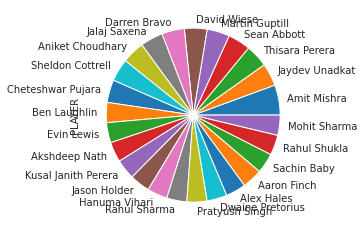

In [112]:
player_count[:25].plot(kind='pie')

In [120]:
player_by_nationality =df.loc[:,["PLAYER", "NATIONALITY"]]
player_by_nationality


,PLAYER,NATIONALITY
0,Ishan Kishan,Indian
1,Deepak Chahar,Indian
2,Shreyas Iyer,Indian
3,Liam Livingstone,Overseas
4,Shardul Thakur,Indian
...,...,...
3857,David Wiese,Overseas
3858,Cameron Boyce,Overseas
3859,Charl Langeveldt,Overseas
3860,Sulieman Benn,Overseas


In [15]:
import seaborn as sns
sns.set_style('darkgrid')

In [121]:
dfnew = df._get_numeric_data()                         #gives numric columns
dfnew

,YEAR
0,2022
1,2022
2,2022
3,2022
4,2022
...,...
3857,2013
3858,2013
3859,2013
3860,2013


In [119]:
player_by_team =df.loc[:,["PLAYER","TEAM"]]
player_by_team

,PLAYER,TEAM
0,Ishan Kishan,Mumbai Indians
1,Deepak Chahar,Chennai Super Kings
2,Shreyas Iyer,Kolkata Knight Riders
3,Liam Livingstone,Punjab Kings
4,Shardul Thakur,Delhi Capitals
...,...,...
3857,David Wiese,NONE
3858,Cameron Boyce,NONE
3859,Charl Langeveldt,NONE
3860,Sulieman Benn,NONE


In [114]:
player_by_price =df.loc[:,["PLAYER","PRICE"]]
player_by_price

,PLAYER,PRICE
0,Ishan Kishan,152500000.00
1,Deepak Chahar,140000000.00
2,Shreyas Iyer,122500000.00
3,Liam Livingstone,115000000.00
4,Shardul Thakur,107500000.00
...,...,...
3857,David Wiese,1170000.00
3858,Cameron Boyce,1170000.00
3859,Charl Langeveldt,1170000.00
3860,Sulieman Benn,1170000.00


#EDA(Exploratory Data Analysis)

###Q.1  Display all the unique player names

In [117]:
df.head(5)

,PLAYER,NATIONALITY,TYPE,PRICE,SOLD/UNSOLD,TEAM,YEAR
0,Ishan Kishan,Indian,Wicket Keeper,152500000.00,SOLD,Mumbai Indians,2022
1,Deepak Chahar,Indian,Bowler,140000000.00,SOLD,Chennai Super Kings,2022
2,Shreyas Iyer,Indian,Batsman,122500000.00,SOLD,Kolkata Knight Riders,2022
3,Liam Livingstone,Overseas,All-Rounder,115000000.00,SOLD,Punjab Kings,2022
4,Shardul Thakur,Indian,Bowler,107500000.00,SOLD,Delhi Capitals,2022


In [19]:
df['PLAYER'].nunique()

1579

In [118]:
df['PLAYER'].unique()

array(['Ishan Kishan', 'Deepak Chahar', 'Shreyas Iyer', ...,
       'Jandre Coetzee', 'Alistair Gray', 'Charl Langeveldt'],
      dtype=object)

#####Answer:

we have in total 1579 Players






##Q.2 Display all the sold player and in which years they are sold

In [21]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [22]:
player_by_sold_year = df[['PLAYER','YEAR']] [df['SOLD/UNSOLD'] == 'SOLD']
player_by_sold_year

,PLAYER,YEAR
0,Ishan Kishan,2022
1,Deepak Chahar,2022
2,Shreyas Iyer,2022
3,Liam Livingstone,2022
4,Shardul Thakur,2022
...,...,...
3833,Ben Laughlin,2013
3834,Akila Dananjaya,2013
3835,Jason Holder,2013
3836,Kusal Janith Perera,2013


##Q.3 Total count of player sold

In [23]:
player_by_sold_count =df[['PLAYER']] [df['SOLD/UNSOLD'] == 'SOLD'].value_counts()
player_by_sold_count

PLAYER                 
Jaydev Unadkat             9
Nathan Coulter-Nile        7
Aaron Finch                5
James Neesham              5
Pawan Negi                 5
                          ..
M. Harisankar Reddy        1
Ashish Reddy               1
Luvnith Sisodia            1
Lukman Hussain Meriwala    1
Zahir Khan Pakteen         1
Length: 552, dtype: int64

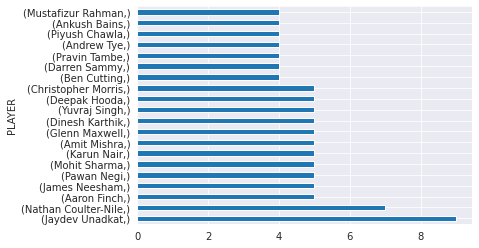

In [24]:
player_by_sold_count[:20].plot(kind='barh')

##Q.4 Display players who are not sold even once with their nationality.

In [25]:
df[['PLAYER','NATIONALITY']] [df['SOLD/UNSOLD'] == 'UNSOLD']

,PLAYER,NATIONALITY
83,Suresh Raina,Indian
84,Steve Smith,Overseas
85,Shakib Al Hasan,Overseas
86,Adil Rashid,Overseas
87,Imran Tahir,Overseas
...,...,...
3857,David Wiese,Overseas
3858,Cameron Boyce,Overseas
3859,Charl Langeveldt,Overseas
3860,Sulieman Benn,Overseas


##Q.5 Display sold player and with their nationality

In [26]:
df[['PLAYER','NATIONALITY']] [df['SOLD/UNSOLD'] == 'SOLD']

,PLAYER,NATIONALITY
0,Ishan Kishan,Indian
1,Deepak Chahar,Indian
2,Shreyas Iyer,Indian
3,Liam Livingstone,Overseas
4,Shardul Thakur,Indian
...,...,...
3833,Ben Laughlin,Overseas
3834,Akila Dananjaya,Overseas
3835,Jason Holder,Overseas
3836,Kusal Janith Perera,Overseas


##Q.6 Display count of sold player on the basis of their nationality

In [27]:
df[['PLAYER','NATIONALITY']] [df['SOLD/UNSOLD'] == 'SOLD'].value_counts()

PLAYER               NATIONALITY
Jaydev Unadkat       Indian         9
Nathan Coulter-Nile  Overseas       7
Aaron Finch          Overseas       5
Glenn Maxwell        Overseas       5
James Neesham        Overseas       5
                                   ..
Johan Botha          Overseas       1
Joel Paris           Overseas       1
Joe Denly            Overseas       1
Jhye Richardson      Overseas       1
Zahir Khan Pakteen   Overseas       1
Length: 557, dtype: int64

##Q.7 Display count of unsold player on the basis of their nationality

In [28]:
df[['PLAYER','NATIONALITY']] [df['SOLD/UNSOLD'] == 'UNSOLD'].value_counts(ascending=False)

PLAYER            NATIONALITY
David Wiese       Overseas       8
Darren Bravo      Overseas       8
Sheldon Cottrell  Overseas       8
Priyank Panchal   Indian         7
Amit Mishra       Indian         7
                                ..
M. Shahruk Khan   Indian         1
M. Siddharth      Indian         1
M.B. Darshan      Indian         1
M.D Shohag Gazi   Overseas       1
Zubayr Hamza      Overseas       1
Length: 1405, dtype: int64

##Q.8 Display the type of player sold with their nationality and price

In [60]:
df[['TYPE','NATIONALITY','PRICE']] [df["SOLD/UNSOLD"] == 'SOLD']

,TYPE,NATIONALITY,PRICE
0,Wicket Keeper,Indian,152500000.00
1,Bowler,Indian,140000000.00
2,Batsman,Indian,122500000.00
3,All-Rounder,Overseas,115000000.00
4,Bowler,Indian,107500000.00
...,...,...,...
3833,Bowler,Overseas,1170000.00
3834,All-Rounder,Overseas,1170000.00
3835,Bowler,Overseas,1170000.00
3836,Wicket Keeper,Overseas,1170000.00


##Q.9 Display type of player unsold with their nationality

In [30]:
df[['TYPE','NATIONALITY']] [df["SOLD/UNSOLD"] == 'UNSOLD']


,TYPE,NATIONALITY
83,Batsman,Indian
84,Batsman,Overseas
85,All-Rounder,Overseas
86,Bowler,Overseas
87,Bowler,Overseas
...,...,...
3857,All-Rounder,Overseas
3858,Bowler,Overseas
3859,Bowler,Overseas
3860,Bowler,Overseas


##Q.10 Display all the sold players

In [31]:
df[df["SOLD/UNSOLD"] == 'SOLD']

,PLAYER,NATIONALITY,TYPE,PRICE,SOLD/UNSOLD,TEAM,YEAR
0,Ishan Kishan,Indian,Wicket Keeper,"? 15,25,00,000.00",SOLD,Mumbai Indians,2022
1,Deepak Chahar,Indian,Bowler,"? 14,00,00,000.00",SOLD,Chennai Super Kings,2022
2,Shreyas Iyer,Indian,Batsman,"? 12,25,00,000.00",SOLD,Kolkata Knight Riders,2022
3,Liam Livingstone,Overseas,All-Rounder,"? 11,50,00,000.00",SOLD,Punjab Kings,2022
4,Shardul Thakur,Indian,Bowler,"? 10,75,00,000.00",SOLD,Delhi Capitals,2022
...,...,...,...,...,...,...,...
3833,Ben Laughlin,Overseas,Bowler,"? 11,70,000.00",SOLD,Chennai Super Kings,2013
3834,Akila Dananjaya,Overseas,All-Rounder,"? 11,70,000.00",SOLD,Chennai Super Kings,2013
3835,Jason Holder,Overseas,Bowler,"? 11,70,000.00",SOLD,Chennai Super Kings,2013
3836,Kusal Janith Perera,Overseas,Wicket Keeper,"? 11,70,000.00",SOLD,Rajasthan Royals,2013


##Q.11 Display the count of player in a team on the basis of their nationality

In [32]:
df.TEAM.value_counts()

NONE                           2892
Royal Challengers Bangalore     115
Sunrisers Hyderabad             112
Mumbai Indians                  107
Kolkata Knight Riders           107
Rajasthan Royals                100
Delhi Daredevils                 85
Kings XI Punjab                  84
Chennai Super Kings              83
Delhi Capitals                   46
Punjab Kings                     32
Gujarat Lions                    30
Rising Pune Supergiant           27
Gujarat Titans                   20
Lucknow Super Giants             18
Pune Warriors India               4
Name: TEAM, dtype: int64

In [33]:
df[['PLAYER','NATIONALITY']] [df['TEAM'] == 'Royal Challengers Bangalore'].value_counts(ascending=True)

PLAYER                  NATIONALITY
Aaron Finch             Overseas       1
Sandeep Warrier         Indian         1
Samuel Badree           Overseas       1
Sachin Rana             Indian         1
Rudra Pratap Singh      Indian         1
                                      ..
Shahbaz Ahamad          Indian         2
Ravi Rampaul            Overseas       2
Sachin Baby             Indian         2
Parthiv Patel           Indian         2
Yuzvendra Singh Chahal  Indian         2
Length: 103, dtype: int64

##Q.12 Display the data of player with highest price

In [79]:
df['PRICE'].max()

'96000000.00'

In [76]:
#df[['PLAYER','TYPE']] [df["PRICE"].max()]


df[df['PRICE']==df['PRICE'].max()]



,PLAYER,NATIONALITY,TYPE,PRICE,SOLD/UNSOLD,TEAM,YEAR
1601,Chris Lynn,Overseas,Batsman,96000000.00,SOLD,Kolkata Knight Riders,2018


##Q.12 Display the data of player with lowest price

In [97]:
df['PRICE'].min()

'1000000.00'

In [105]:
df[df['PRICE']==df['PRICE'].min()] 

,PLAYER,NATIONALITY,TYPE,PRICE,SOLD/UNSOLD,TEAM,YEAR
2336,Ankeet Bawane,Indian,Batsman,1000000.00,SOLD,Delhi Daredevils,2017
2337,Navdeep Saini,Indian,Bowler,1000000.00,SOLD,Delhi Daredevils,2017
2338,Shashank Singh,Indian,All-Rounder,1000000.00,SOLD,Delhi Daredevils,2017
2339,Akshdeep Nath,Indian,All-Rounder,1000000.00,SOLD,Gujarat Lions,2017
2340,Shubam Agrawal,Indian,All-Rounder,1000000.00,SOLD,Gujarat Lions,2017
...,...,...,...,...,...,...,...
3749,Shelly Shaurya,Indian,Bowler,1000000.00,UNSOLD,NONE,2014
3750,Napoleon Einstein,Overseas,Batsman,1000000.00,UNSOLD,NONE,2014
3751,Bhargav Bhatt,Indian,Bowler,1000000.00,UNSOLD,NONE,2014
3752,Sarabjit Ladda,Indian,Bowler,1000000.00,UNSOLD,NONE,2014


## MORE Questions

1. display player who are sold every year

2. display player who are sold every year by different team

3. display the team with highest price sold player and lowest price sold player

4. display player who are sold every year by same team

5. display count of players,yearwise total price of all the players in different teams.

###Insights:

1. No missing values in data

2. Dataset is not 100% accurate i.e some data of the players is missing from the dataset itself which should have been there.

